In [1]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 174 kB of archives.
After this operation, 754 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 poppler-utils amd64 0.86.1-0ubuntu1.1 [174 kB]
Fetched 174 kB in 1s (158 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 128275 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.86.1-0ubuntu1.1_amd64.deb ...
Unpacking poppler-utils (0.86.1-0ubuntu1.1) ...
Setting up poppler-utils (0.86.1-0ubuntu1.1) ...
Processing triggers for man-db (2.9.1-1) ...


In [2]:
!pip install pdf2image
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.2/608.2 KB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 19.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


In [3]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

In [4]:
reader=easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [15]:
images=convert_from_path("scansmpl.pdf")

In [16]:
len(images)

1

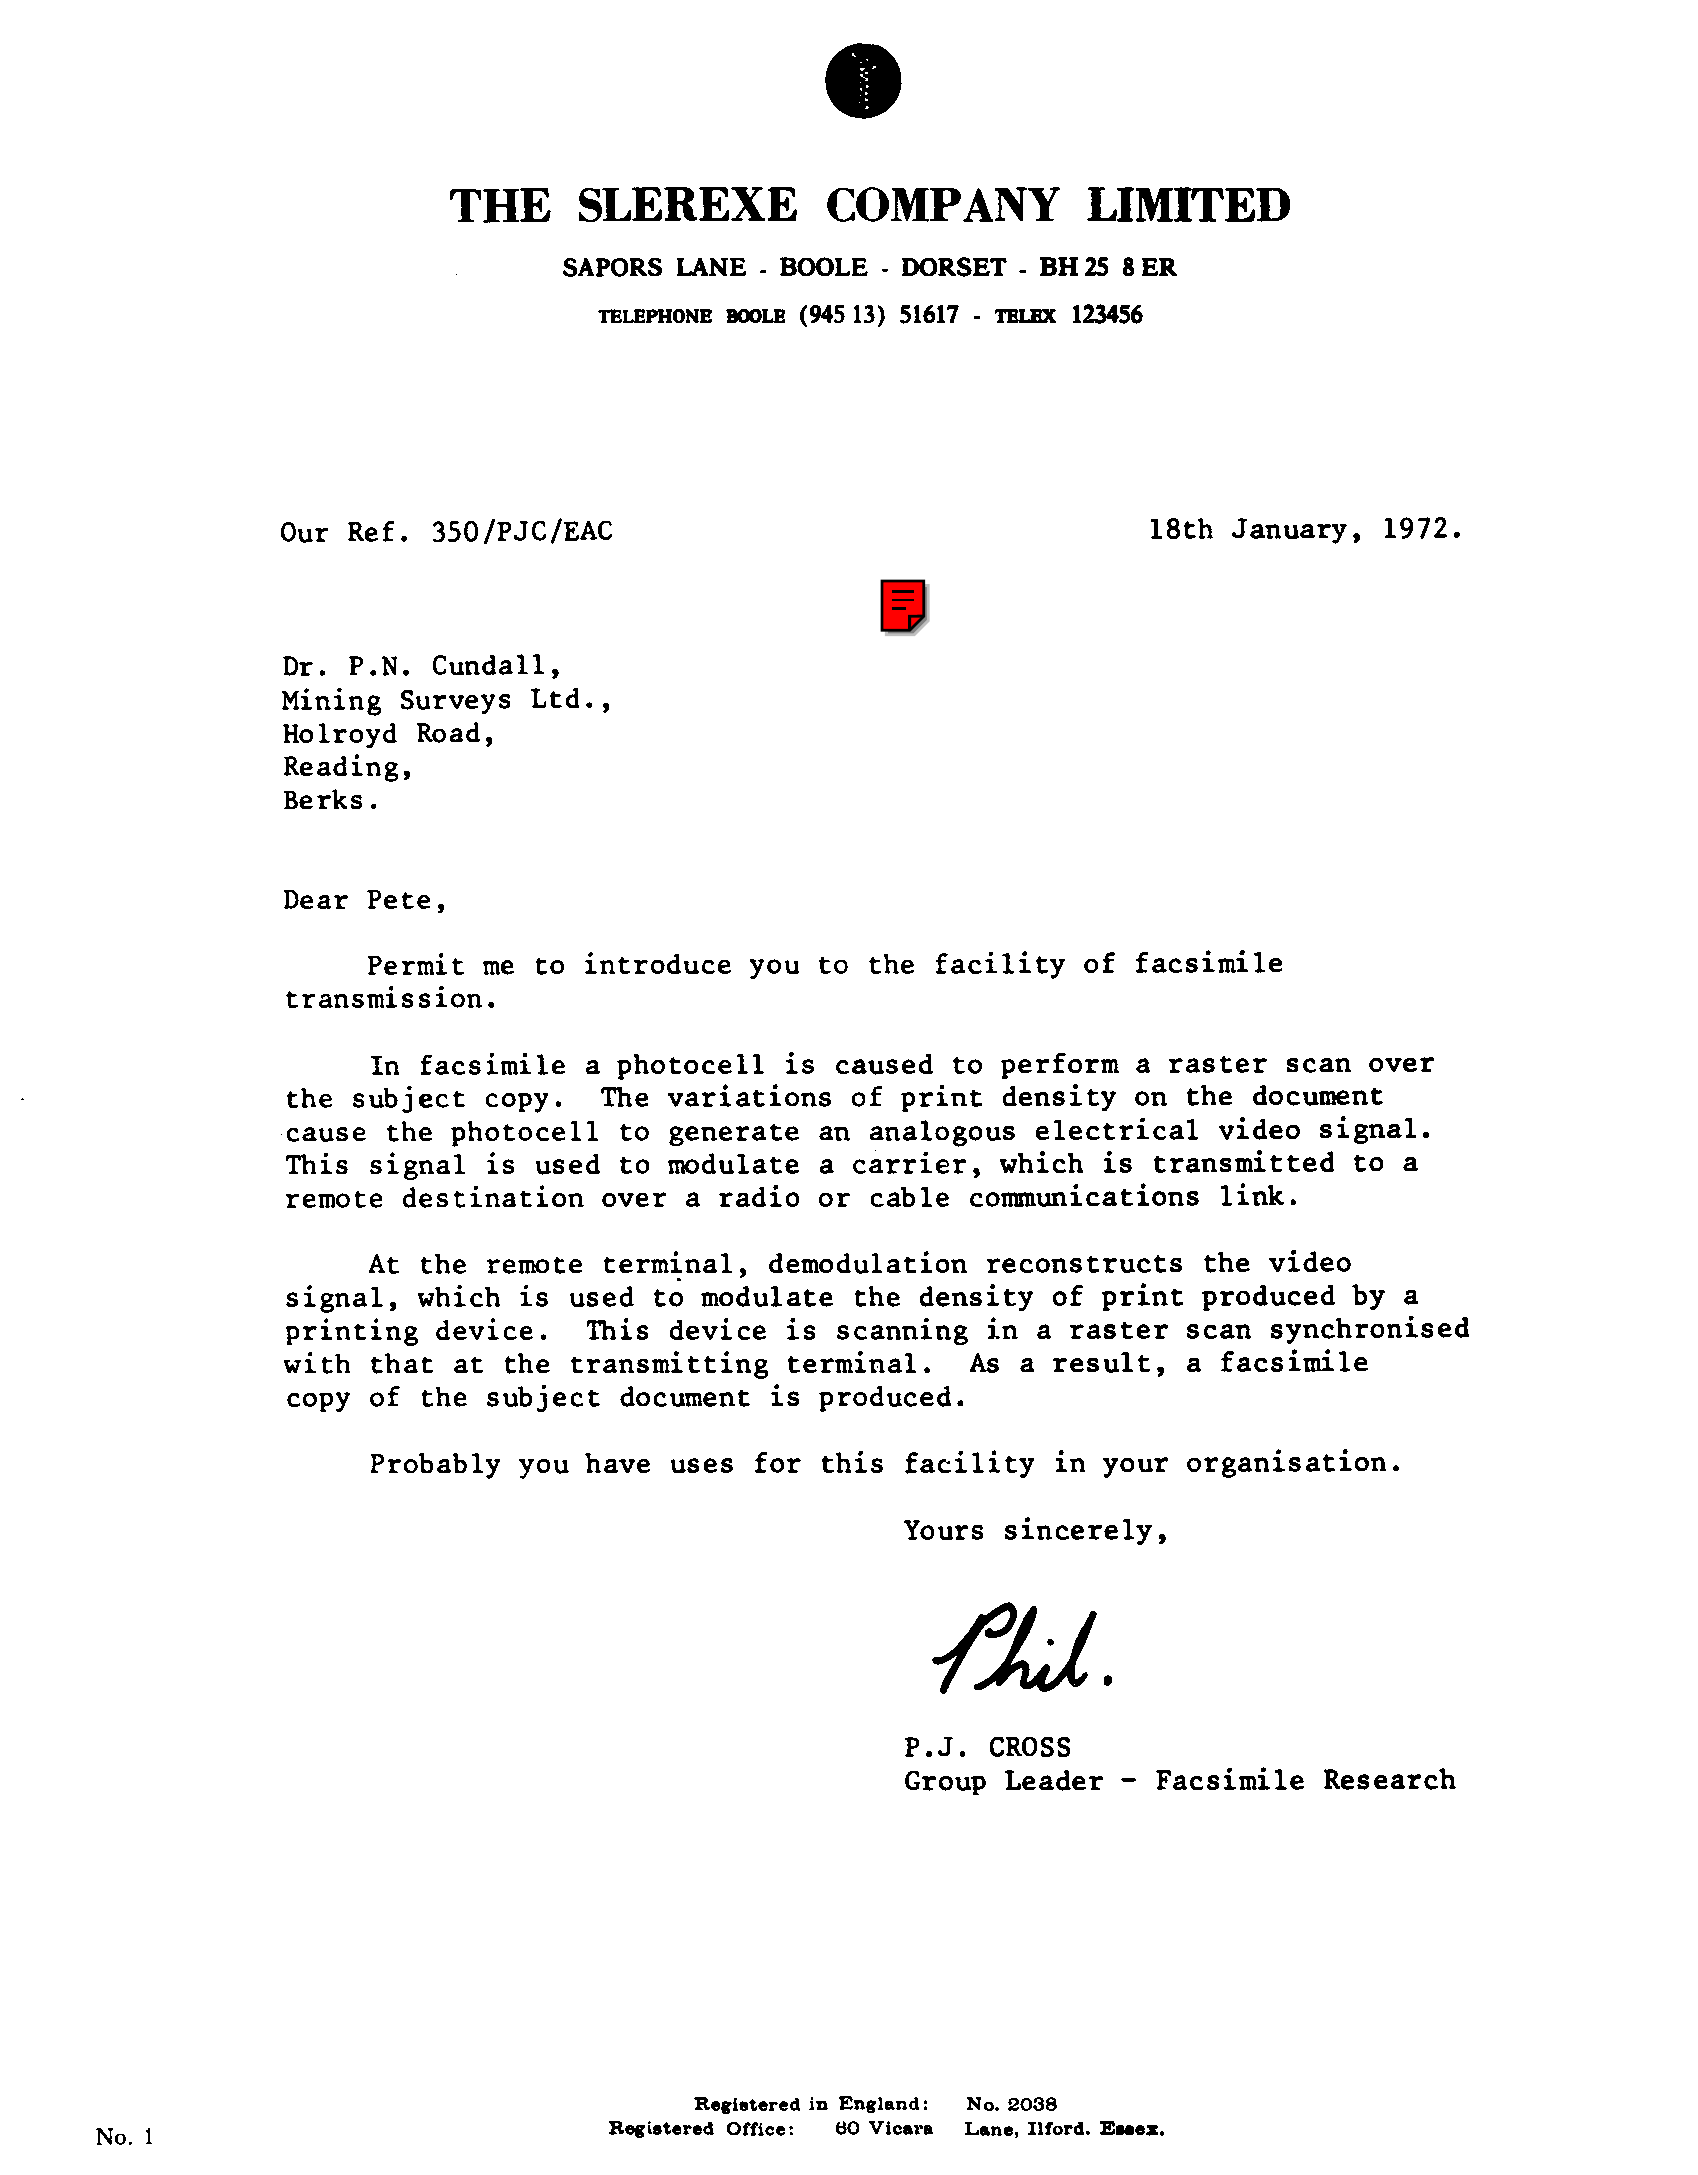

In [17]:
from IPython.display import display, Image
display(images[0])

In [18]:
bounds = reader.readtext(np.array(images[0]))
bounds

[([[447, 182], [557, 182], [557, 226], [447, 226]], 'THE', 0.999958842455258),
 ([[570, 180], [804, 180], [804, 228], [570, 228]],
  'SLEREXE',
  0.7436111647485029),
 ([[820, 179], [1066, 179], [1066, 227], [820, 227]],
  'COMPANY',
  0.9999328194688163),
 ([[1080, 180], [1296, 180], [1296, 228], [1080, 228]],
  'LIMITED',
  0.9986524611037886),
 ([[560, 254], [752, 254], [752, 282], [560, 282]],
  'SAPORS LANE',
  0.7222134267344369),
 ([[776, 252], [872, 252], [872, 282], [776, 282]],
  'BOOLE',
  0.9236139975970972),
 ([[898, 252], [1012, 252], [1012, 282], [898, 282]],
  'DORSET',
  0.9998741940557054),
 ([[1036, 252], [1180, 252], [1180, 282], [1036, 282]],
  'BH 25 8 ER',
  0.9509374281058833),
 ([[593, 303], [715, 303], [715, 327], [593, 327]],
  'TELEPHONE',
  0.9991454046760536),
 ([[722, 300], [964, 300], [964, 332], [722, 332]],
  'BOOLE (945 13) 51617',
  0.7362808195665868),
 ([[992, 300], [1148, 300], [1148, 330], [992, 330]],
  'TELEX   123456',
  0.6161445424539993),
 

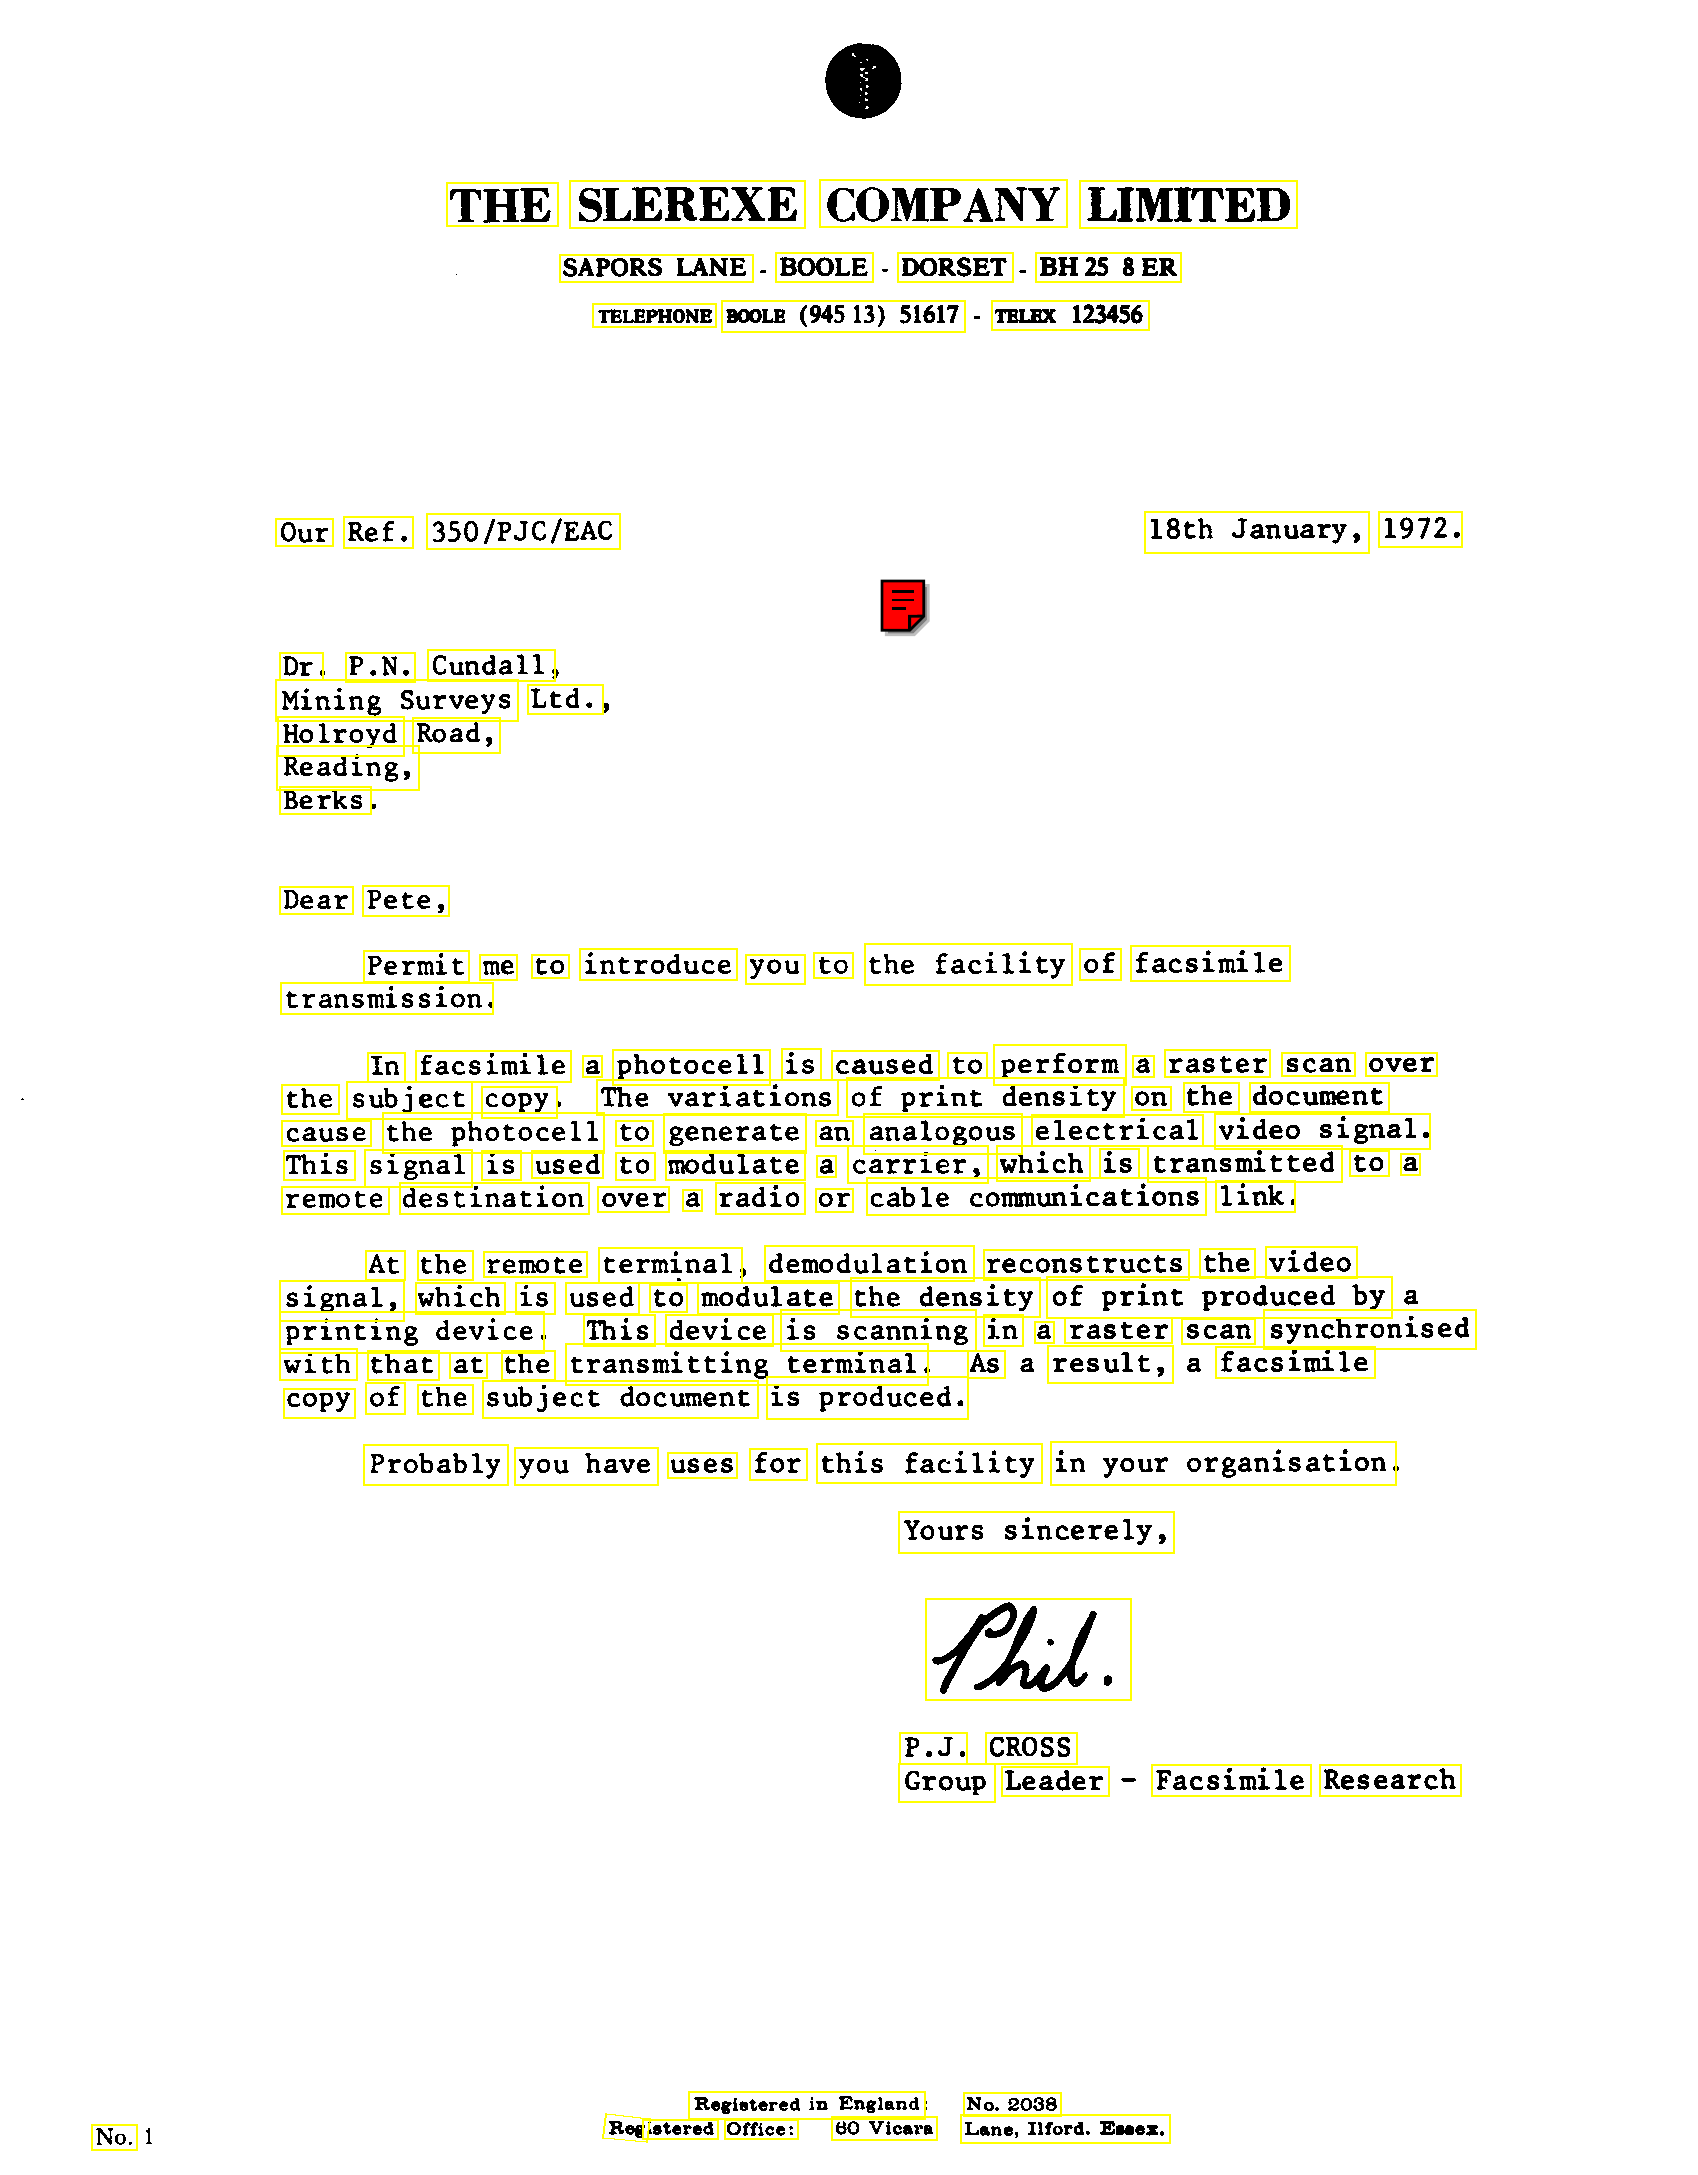

In [19]:
def draw_boxes(image, bounds, color='yellow', width=2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0, p1, p2, p3 = bound[0]
    draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
  return image

draw_boxes(images[0], bounds)

In [20]:
bounds[0][0]

[[447, 182], [557, 182], [557, 226], [447, 226]]

In [21]:
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] + '\n'
print(text)

THE
SLEREXE
COMPANY
LIMITED
SAPORS LANE
BOOLE
DORSET
BH 25 8 ER
TELEPHONE
BOOLE (945 13) 51617
TELEX   123456
Our
Ref .
350 /PJC /EAC
18th January,
1972 .
Dr _
P.N,
Cundall .
Mining Surveys
Ltd.
Holroyd
Road ,
Reading,
Berks
Dear
Pete,
Permit
me
to
introduce
you
to
the facility
of
facsimi le
transmission _
In
facsimi le
a
photocell
is
caused
to
Perform
a
raster
scan
over
the
sub ject
copy
The variations
of print density
on
the
document
cause
the photocell
to
generate
an
analogous
electrical
video signal .
This
signal
is
used
to
modulate
a
carrier,
which
is
cransmitted
to
a
remote
destination
over
a
radio
or
cable comunications
link _
At
the
remote
terminal 
demodulation
reconstructs
the
video
signal,
which
is
used
to
modulate
the density
of print produced by
printing device_
mhis
device
is scanning
in
a
raster
scan
synchronised
with
that
at
che
transmitting terminal _
As
result,
facsimile
copy
of
the
subject document
is produced.
Probably
you have
uses
for
this facility
in your organis

In [22]:
nlp = spacy.load('en_core_web_sm')


In [23]:
doc = nlp(text)

In [24]:
from spacy import displacy

displacy.render(nlp(doc.text), style='ent', jupyter=True)

In [ ]:
# easyocr for images

In [ ]:
import os
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
IMAGE_PATH = ['ocr_test.png', "rent_reciept.jpg", "handwriting.png", "Email2.PNG"]

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH[0],paragraph="False")
result

[[[[14, 12], [382, 12], [382, 173], [14, 173]],
  'Properties UiPath Core ActivitiesGoogleOCR Common Display Name Tesseract OCR Input'],
 [[[426, 33], [458, 33], [458, 221], [426, 221]], '7 iiii ?'],
 [[[41, 189], [95, 189], [95, 209], [41, 209]], 'Image'],
 [[[273, 189], [359, 189], [359, 207], [273, 207]], 'our_Image'],
 [[[39, 221], [83, 221], [83, 241], [39, 241]], 'Misc'],
 [[[38, 253], [194, 253], [194, 401], [38, 401]],
  'Private Options AllowedCharacters DeniedCharacters ExtractWords'],
 [[[41, 415], [91, 415], [91, 433], [41, 433]], 'Invert'],
 [[[39, 447], [124, 447], [124, 506], [39, 506]], 'Language Profile'],
 [[[264, 448], [326, 448], [326, 508], [264, 508]], '\'eng" Legacy'],
 [[[41, 519], [87, 519], [87, 539], [41, 539]], 'Scale'],
 [[[37, 551], [106, 551], [106, 609], [37, 609]], 'Output Result'],
 [[[271, 587], [379, 587], [379, 607], [271, 607]], 'The extracted'],
 [[[41, 625], [77, 625], [77, 645], [41, 645]], 'Text'],
 [[[271, 625], [379, 625], [379, 645], [271, 6

In [ ]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH[0])
result

Using CPU. Note: This module is much faster with a GPU.


[([[16, 12], [104, 12], [104, 36], [16, 36]],
  'Properties',
  0.9999661475029922),
 ([[14, 48], [286, 48], [286, 74], [14, 74]],
  'UiPath Core ActivitiesGoogleOCR',
  0.8213473024068777),
 ([[36, 86], [120, 86], [120, 110], [36, 110]], 'Common', 0.9999765424496286),
 ([[431, 33], [451, 33], [451, 117], [431, 117]], '7', 0.05863704526840596),
 ([[39, 118], [156, 118], [156, 144], [39, 144]],
  'Display Name',
  0.8142450870779302),
 ([[266, 116], [382, 116], [382, 140], [266, 140]],
  'Tesseract OCR',
  0.9999187222055145),
 ([[426, 128], [458, 128], [458, 160], [426, 160]],
  'iiii',
  0.5390639305114746),
 ([[37, 153], [89, 153], [89, 173], [37, 173]], 'Input', 0.8927900715690619),
 ([[41, 189], [95, 189], [95, 209], [41, 209]], 'Image', 0.8253325395715136),
 ([[273, 189], [359, 189], [359, 207], [273, 207]],
  'our_Image',
  0.9640153838974658),
 ([[433, 159], [451, 159], [451, 221], [433, 221]], '?', 0.19294979792118827),
 ([[39, 221], [83, 221], [83, 241], [39, 241]], 'Misc', 0.

In [ ]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

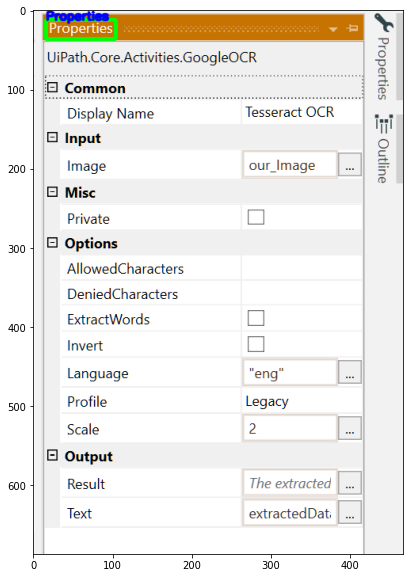

In [ ]:
img = cv2.imread(IMAGE_PATH[0])
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(0,0,255),2,cv2.LINE_AA)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [ ]:
img = cv2.imread(IMAGE_PATH[0])
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15

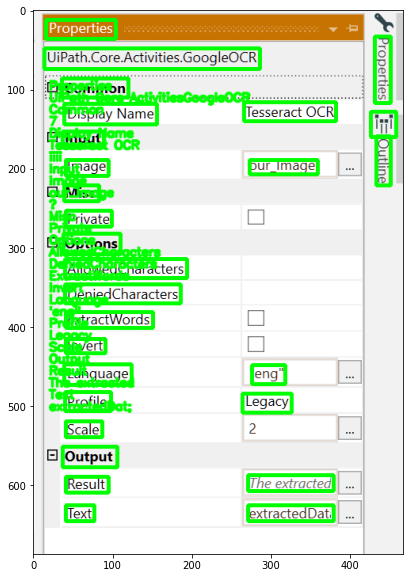

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH[1],paragraph="False")
result

[[[[0, 26], [34, 26], [34, 50], [0, 50]], 'No.'],
 [[[59, 17], [155, 17], [155, 59], [59, 59]], '1111'],
 [[[320, 10], [453, 10], [453, 58], [320, 58]], 'RECEIPT)'],
 [[[547, 6], [666, 6], [666, 54], [547, 54]], 'Date_ lalle'],
 [[[0, 87], [562, 87], [562, 190], [0, 190]],
  'Received with thanks from Ms IMTS:. JXXax_. G24.Hes hxe_D evul a sum of Rupees G&k'],
 [[[0, 242], [316, 242], [316, 288], [0, 288]], 'CX by Cash Cheque Noz'],
 [[[362, 235], [633, 235], [633, 271], [362, 271]],
  'J. Date_ feeee_Drawn ona'],
 [[[131, 299], [523, 299], [523, 429], [131, 429]],
  '44a2- & 222I Eeu< 224 Room No 8o2l'],
 [[[0, 330], [76, 330], [76, 360], [0, 360]], 'owards_'],
 [[[0, 378], [84, 378], [84, 428], [0, 428]], 'Rs.t']]

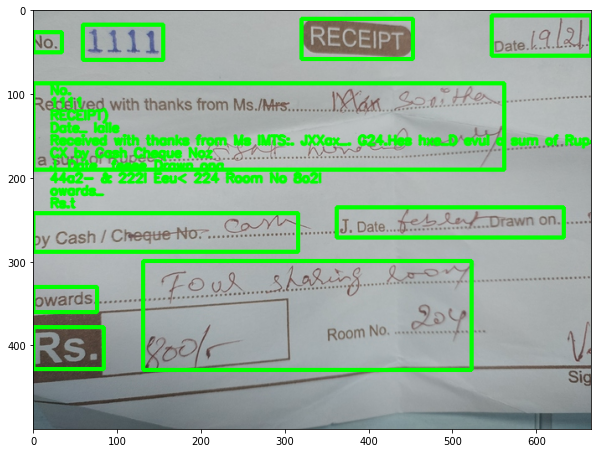

In [ ]:
img = cv2.imread(IMAGE_PATH[1])
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

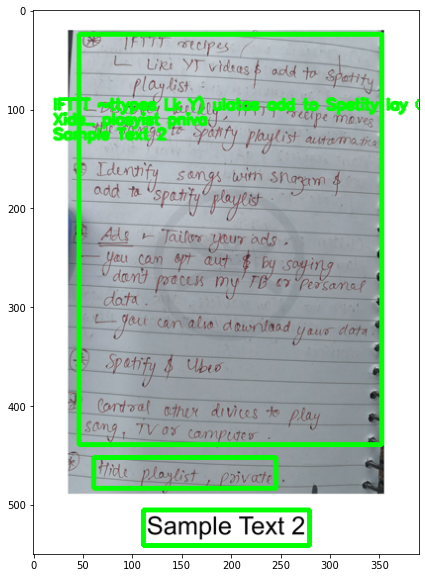

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH[2],paragraph="False")

img = cv2.imread(IMAGE_PATH[2])
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

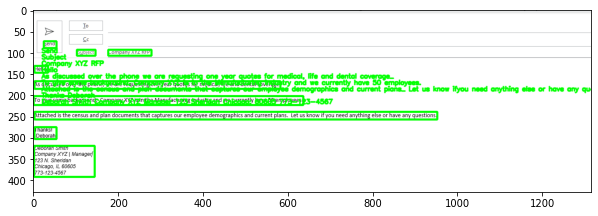

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH[3],paragraph="False")

img = cv2.imread(IMAGE_PATH[3])
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [ ]:
result

[[[[25, 73], [55, 73], [55, 89], [25, 89]], 'Send'],
 [[[103, 93], [147, 93], [147, 107], [103, 107]], 'Subject'],
 [[[177, 93], [279, 93], [279, 107], [177, 107]], 'Company XYZ RFP'],
 [[[3, 131], [35, 131], [35, 147], [3, 147]], 'Hello'],
 [[[3, 167], [583, 167], [583, 185], [3, 185]],
  'As discussed over the phone we are requesting one year quotes for medical, life and dental coverage_'],
 [[[1, 202], [637, 202], [637, 223], [1, 223]],
  'To give some background, Company XYZ is in the Manufacturing industry and we currently have 50 employees.'],
 [[[3, 239], [953, 239], [953, 257], [3, 257]],
  'Attached is the census and plan documents that captures our employee demographics and current pians_ Let us know ifyou need anything else or have any questions.'],
 [[[3, 275], [55, 275], [55, 303], [3, 303]], 'Thanks Deborah'],
 [[[2, 319], [145, 319], [145, 392], [2, 392]],
  'Deborah Smith Company XYZ Manager 123 Sneridan Cnicago; 60605 773-123-4567']]